# Keras Implementation
[Materials](https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529)

We will use CIFAR-10 dataset to build a CNN image classifier. CIFAR-10 dataset has 10 different labels
* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck   

It has 50,000 training data and 10,000 testing image data. Image size in CIFAR-10 is 32 x 32 x 3. It comes with Keras library   

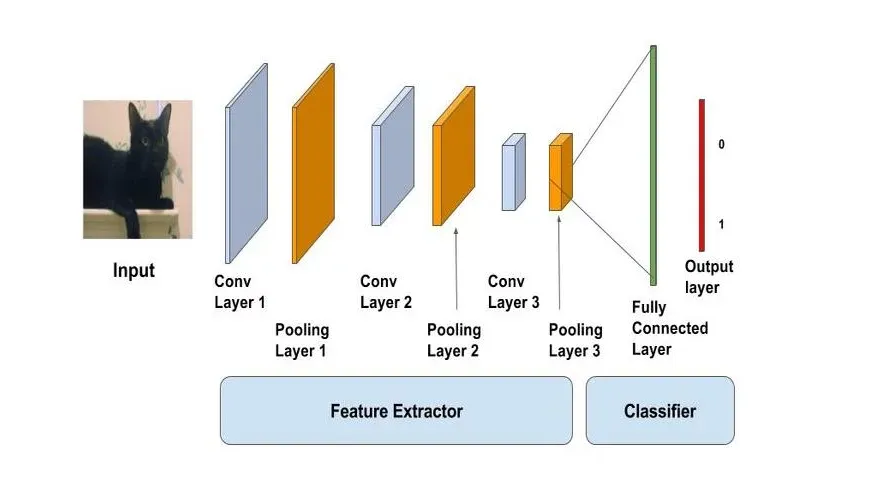

## Check GPU

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Load libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## Data Processing

In [4]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)


170498071/170498071 [==============================] - 15s 0us/step
Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

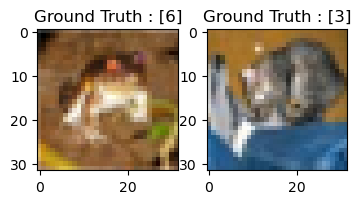

In [6]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

### Reshape data

In [7]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

### Normalize the data

In [8]:
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [9]:
## Display the change for category label using one-hot encoding.
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Create Model
* We will add up Convo layers followed by pooling layers.
* Then we will connect Dense(FC) layer to predict the classes.
* Input data fed to first Convo layer, output of that Convo layer acts as input for next Convo layer and so on.
* Finally data is fed to FC layer which try to predict the correct labels.

In [10]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

### Initialize all parameters and specify loss function and optimizer


In [11]:
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

`model.summary()` is used to see all parameters and shapes in each layers in our models.    
You can observe that total parameters are 276, 138 and total trainable parameters are 276, 138.     
Non-trainable parameter is 0.

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

### Fit data in

In [13]:
history = model1.fit(train_data, 
                     train_labels_one_hot, 
                     batch_size=batch_size, 
                     epochs=epochs, 
                     verbose=1, 
                     validation_data=(test_data, test_labels_one_hot))

model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 23s 21ms/step - loss: 2.0635 - accuracy: 0.2349 - val_loss: 1.7800 - val_accuracy: 0.3685
Epoch 2/50
196/196 [==============================] - 3s 13ms/step - loss: 1.7274 - accuracy: 0.3723 - val_loss: 1.7093 - val_accuracy: 0.3618
Epoch 3/50
196/196 [==============================] - 3s 14ms/step - loss: 1.5212 - accuracy: 0.4532 - val_loss: 1.3849 - val_accuracy: 0.5216
Epoch 4/50
196/196 [==============================] - 3s 13ms/step - loss: 1.3829 - accuracy: 0.5051 - val_loss: 1.3491 - val_accuracy: 0.5238
Epoch 5/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2761 - accuracy: 0.5458 - val_loss: 1.1934 - val_accuracy: 0.5774
Epoch 6/50
196/196 [==============================] - 3s 13ms/step - loss: 1.1873 - accuracy: 0.5760 - val_loss: 1.3081 - val_accuracy: 0.5609
Epoch 7/50
196/196 [==============================] - 3s 13ms/step - loss: 1.1227 - accuracy: 0.6057 - val_loss: 1.1414 - val_accuracy: 0.600

[0.6583714485168457, 0.7932999730110168]

### Evaluate results

Text(0.5, 1.0, 'Loss Curves')

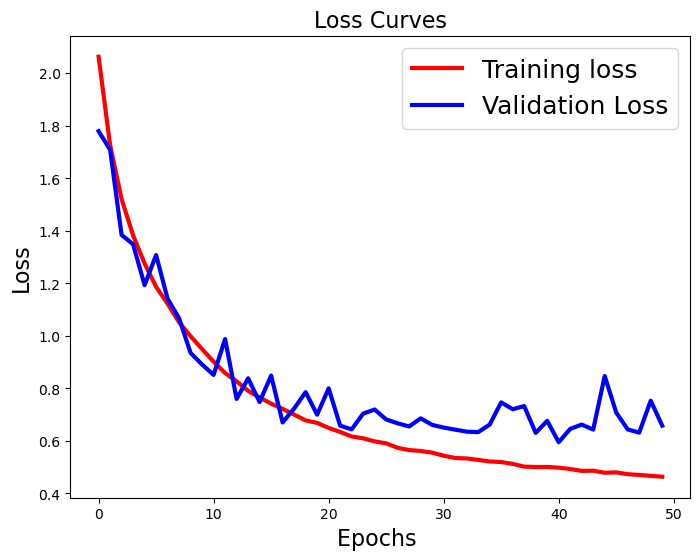

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

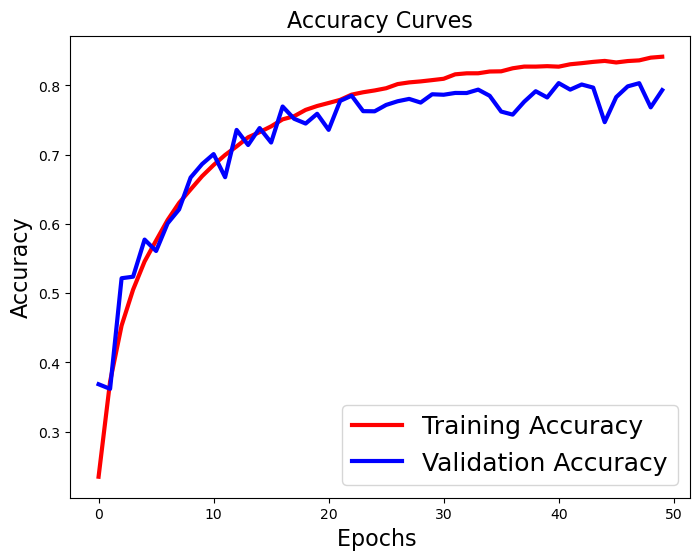

In [18]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)